In [1]:
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import seaborn as snsS
from sklearn.preprocessing import MinMaxScaler,StandardScaler
scaler=MinMaxScaler()

# # DISPLAYING DATA SET

In [4]:
df=pd.read_csv(r"C:\Dhaval\dataset\dataset_heart.csv")

In [5]:
df.shape

(270, 14)

In [6]:
df.head(10)

,age,sex,chest pain type,resting blood pressure,serum cholestoral,fasting blood sugar,resting electrocardiographic results,max heart rate,exercise induced angina,oldpeak,ST segment,major vessels,thal,heart disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1
5,65,1,4,120,177,0,0,140,0,0.4,1,0,7,1
6,56,1,3,130,256,1,2,142,1,0.6,2,1,6,2
7,59,1,4,110,239,0,2,142,1,1.2,2,1,7,2
8,60,1,4,140,293,0,2,170,0,1.2,2,2,7,2
9,63,0,4,150,407,0,2,154,0,4.0,2,3,7,2


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   270 non-null    int64  
 1   sex                                   270 non-null    int64  
 2   chest pain type                       270 non-null    int64  
 3   resting blood pressure                270 non-null    int64  
 4   serum cholestoral                     270 non-null    int64  
 5   fasting blood sugar                   270 non-null    int64  
 6   resting electrocardiographic results  270 non-null    int64  
 7   max heart rate                        270 non-null    int64  
 8   exercise induced angina               270 non-null    int64  
 9   oldpeak                               270 non-null    float64
 10  ST segment                            270 non-null    int64  
 11  major vessels      

# # NULL VALUES

In [8]:
df.isna().sum()

age                                     0
sex                                     0
chest pain type                         0
resting blood pressure                  0
serum cholestoral                       0
fasting blood sugar                     0
resting electrocardiographic results    0
max heart rate                          0
exercise induced angina                 0
oldpeak                                 0
ST segment                              0
major vessels                           0
thal                                    0
heart disease                           0
dtype: int64

# # LABEL ENCODING

In [9]:
from sklearn.preprocessing import LabelEncoder

# Create a new DataFrame with the desired columns
data_df = pd.DataFrame(df, columns =['age','sex', 'chest pain type', 'fasting blood sugar', 'resting electrocardiographic results', 'exercise induced angina', 'ST segment', 'major vessels', 'thal', 'heart disease'])

# Apply label encoding to each column
for column in data_df.columns:
    label_encoder = LabelEncoder()
    data_df[column] = label_encoder.fit_transform(data_df[column])

# Print the updated DataFrame
print(data_df)

     age  sex  chest pain type  fasting blood sugar  \
0     36    0                3                    0   
1     33    0                2                    0   
2     23    0                1                    0   
3     30    0                3                    0   
4     38    0                1                    0   
..   ...  ...              ...                  ...   
265   18    0                2                    1   
266   10    0                1                    0   
267   22    0                1                    0   
268   23    0                3                    0   
269   33    0                3                    0   

     resting electrocardiographic results  exercise induced angina  \
0                                       2                        0   
1                                       2                        0   
2                                       0                        0   
3                                       0                  

In [10]:
data_df.head(5)

,age,sex,chest pain type,fasting blood sugar,resting electrocardiographic results,exercise induced angina,ST segment,major vessels,thal,heart disease
0,36,0,3,0,2,0,1,3,0,1
1,33,0,2,0,2,0,1,0,2,0
2,23,0,1,0,0,0,0,0,2,1
3,30,0,3,0,0,1,1,1,2,0
4,38,0,1,0,2,1,0,1,0,0


# # one hot encoding

In [11]:
categorical_cols = ['sex', 'chest pain type', 'fasting blood sugar', 'resting electrocardiographic results', 'exercise induced angina', 'ST segment', 'major vessels', 'thal']

In [12]:
encoded_df = pd.get_dummies(data_df, columns=categorical_cols,dtype=int)

In [13]:
print(encoded_df)

     age  heart disease  sex_0  chest pain type_0  chest pain type_1  \
0     36              1      1                  0                  0   
1     33              0      1                  0                  0   
2     23              1      1                  0                  1   
3     30              0      1                  0                  0   
4     38              0      1                  0                  1   
..   ...            ...    ...                ...                ...   
265   18              0      1                  0                  0   
266   10              0      1                  0                  1   
267   22              0      1                  0                  1   
268   23              0      1                  0                  0   
269   33              1      1                  0                  0   

     chest pain type_2  chest pain type_3  fasting blood sugar_0  \
0                    0                  1                      1   

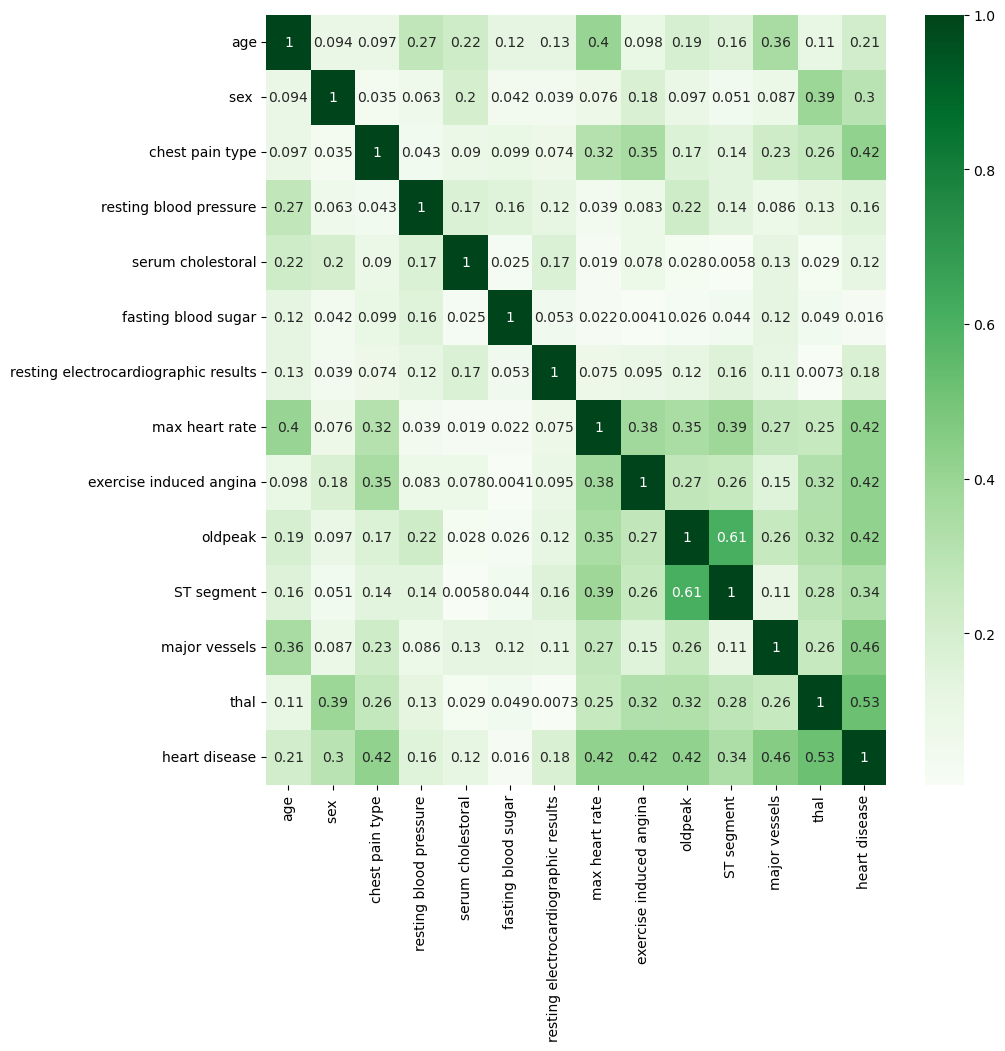

In [56]:
corr_matrix = df.corr().abs()

filtered_corr_df = corr_matrix

plt.figure(figsize=(10,10))
sns.heatmap(filtered_corr_df, annot=True, cmap="Greens")
plt.show()

# # x train x test

In [15]:
from sklearn.model_selection import train_test_split

X = df.drop("heart disease", axis=1)
y = df["heart disease"]


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
X_train.shape,y_train.shape

((216, 13), (216,))

# # x train x test scaler

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
df.describe()

,age,sex,chest pain type,resting blood pressure,serum cholestoral,fasting blood sugar,resting electrocardiographic results,max heart rate,exercise induced angina,oldpeak,ST segment,major vessels,thal,heart disease
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,1.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,1.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,2.000000


In [20]:
scaler=StandardScaler()

In [21]:
scaler.fit(X_train)

StandardScaler()

In [22]:
x_train_scaler=scaler.transform(X_train)
x_test_scaler=scaler.transform(X_test)

In [23]:
x_train_scaler

array([[-0.63296991, -1.52416434, -1.21490572, ...,  0.66200384,
        -0.71458405, -0.90541914],
       [ 0.46519475,  0.65609723,  0.8432875 , ...,  2.30559959,
        -0.71458405,  1.15321806],
       [-0.19370404,  0.65609723, -0.18580911, ..., -0.98159191,
         2.4141353 , -0.90541914],
       ...,
       [ 0.24556182, -1.52416434,  0.8432875 , ..., -0.98159191,
        -0.71458405, -0.90541914],
       [-0.41333698,  0.65609723, -0.18580911, ...,  0.66200384,
        -0.71458405, -0.90541914],
       [-0.63296991, -1.52416434,  0.8432875 , ..., -0.98159191,
        -0.71458405, -0.90541914]])

In [24]:
x_test_scaler

array([[ 2.45561820e-01,  6.56097231e-01, -1.85809110e-01,
        -2.11259717e-01, -4.12347574e-01, -3.93802252e-01,
         9.68122770e-01,  4.03652951e-02, -7.36788398e-01,
        -5.93840500e-01,  6.62003843e-01,  3.28322400e-01,
         1.15321806e+00],
       [-9.62419307e-01,  6.56097231e-01,  8.43287501e-01,
        -6.59732432e-01, -2.24719952e-02, -3.93802252e-01,
         9.68122770e-01, -2.22516225e-01, -7.36788398e-01,
        -2.53377201e-01, -9.81591905e-01, -7.14584048e-01,
         1.15321806e+00],
       [ 1.35745354e-01,  6.56097231e-01, -1.21490572e+00,
        -6.59732432e-01, -2.75891121e-01, -3.93802252e-01,
        -1.04259375e+00,  1.26714572e+00, -7.36788398e-01,
        -2.53377201e-01, -9.81591905e-01, -7.14584048e-01,
        -9.05419137e-01],
       [-3.03520510e-01, -1.52416434e+00, -1.85809110e-01,
         2.37212999e-01, -1.05564228e+00, -3.93802252e-01,
         9.68122770e-01,  8.72823441e-01, -7.36788398e-01,
        -8.49187974e-01,  6.62003843e

In [25]:
x_train_scaler=pd.DataFrame(x_train_scaler,columns=X_train.columns)

In [26]:
x_train_scaler

,age,sex,chest pain type,resting blood pressure,serum cholestoral,fasting blood sugar,resting electrocardiographic results,max heart rate,exercise induced angina,oldpeak,ST segment,major vessels,thal
0,-0.632970,-1.524164,-1.214906,0.125095,0.406391,-0.393802,-1.042594,0.566128,-0.736788,-0.934304,0.662004,-0.714584,-0.905419
1,0.465195,0.656097,0.843288,2.143222,1.478549,-0.393802,0.968123,-0.397771,1.357242,1.959634,2.305600,-0.714584,1.153218
2,-0.193704,0.656097,-0.185809,-0.099142,-0.080953,2.539346,0.968123,1.048078,-0.736788,-0.934304,-0.981592,2.414135,-0.905419
3,-0.523153,0.656097,-0.185809,0.461449,-0.334372,-0.393802,-1.042594,0.609942,-0.736788,-0.423609,0.662004,0.328322,1.153218
4,-0.083888,-1.524164,-0.185809,-1.220323,-0.704754,-0.393802,-1.042594,0.390874,-0.736788,0.427549,0.662004,-0.714584,-0.905419
...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,1.343726,0.656097,0.843288,-0.659732,-0.412348,-0.393802,0.968123,-0.879720,1.357242,1.278708,0.662004,1.371229,1.153218
212,0.794644,-1.524164,0.843288,0.461449,2.804126,-0.393802,0.968123,0.347060,-0.736788,0.087086,0.662004,-0.714584,-0.905419
213,0.245562,-1.524164,0.843288,-0.659732,2.024375,-0.393802,-1.042594,0.609942,1.357242,-0.423609,-0.981592,-0.714584,-0.905419
214,-0.413337,0.656097,-0.185809,-1.780914,-0.548804,-0.393802,-1.042594,-0.266330,1.357242,0.087086,0.662004,-0.714584,-0.905419


In [27]:
x_test_scaler=pd.DataFrame(x_test_scaler,columns=X_test.columns)

In [28]:
x_test_scaler

,age,sex,chest pain type,resting blood pressure,serum cholestoral,fasting blood sugar,resting electrocardiographic results,max heart rate,exercise induced angina,oldpeak,ST segment,major vessels,thal
0,0.245562,0.656097,-0.185809,-0.211260,-0.412348,-0.393802,0.968123,0.040365,-0.736788,-0.593840,0.662004,0.328322,1.153218
1,-0.962419,0.656097,0.843288,-0.659732,-0.022472,-0.393802,0.968123,-0.222516,-0.736788,-0.253377,-0.981592,-0.714584,1.153218
2,0.135745,0.656097,-1.214906,-0.659732,-0.275891,-0.393802,-1.042594,1.267146,-0.736788,-0.253377,-0.981592,-0.714584,-0.905419
3,-0.303521,-1.524164,-0.185809,0.237213,-1.055642,-0.393802,0.968123,0.872823,-0.736788,-0.849188,0.662004,-0.714584,-0.905419
4,0.355378,-1.524164,0.843288,-1.780914,-0.041966,-0.393802,0.968123,-1.186415,-0.736788,-0.083146,0.662004,-0.714584,-0.905419
5,0.135745,0.656097,0.843288,-0.379437,-0.022472,2.539346,0.968123,-0.222516,1.357242,0.087086,0.662004,0.328322,-0.905419
6,-1.950768,0.656097,-0.185809,-0.099142,-0.002978,-0.393802,-1.042594,1.661468,-0.736788,2.044750,2.305600,-0.714584,-0.905419
7,0.355378,0.656097,-0.185809,0.461449,-0.763236,2.539346,0.968123,0.697569,-0.736788,-0.934304,-0.981592,-0.714584,-0.905419
8,0.135745,0.656097,-2.244002,-0.659732,-1.114124,-0.393802,0.968123,0.566128,-0.736788,0.682897,0.662004,-0.714584,1.153218
9,1.124094,-1.524164,-0.185809,1.302336,0.367404,-0.393802,-1.042594,-0.047262,-0.736788,-0.253377,-0.981592,-0.714584,-0.905419


In [29]:
x_test_scaler.describe()

,age,sex,chest pain type,resting blood pressure,serum cholestoral,fasting blood sugar,resting electrocardiographic results,max heart rate,exercise induced angina,oldpeak,ST segment,major vessels,thal
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000
mean,-0.181502,-0.232157,-0.033350,-0.118866,-0.048103,0.203691,-0.074471,0.131238,-0.232670,-0.202938,-0.098920,-0.077252,-0.162022
std,0.988156,1.081335,0.880678,1.000872,1.036892,1.192421,1.014102,1.067282,0.903674,0.844632,1.045025,0.915408,0.982959
min,-2.170400,-1.524164,-2.244002,-2.117269,-2.420207,-0.393802,-1.042594,-2.281755,-0.736788,-0.934304,-0.981592,-0.714584,-0.905419
25%,-1.072236,-1.524164,-0.185809,-0.659732,-0.836337,-0.393802,-1.042594,-0.474444,-0.736788,-0.934304,-0.981592,-0.714584,-0.905419
50%,-0.083888,0.656097,-0.185809,-0.099142,0.016516,-0.393802,-1.042594,0.193713,-0.736788,-0.423609,-0.981592,-0.714584,-0.905419
75%,0.355378,0.656097,0.843288,0.321302,0.601329,-0.393802,0.968123,0.982357,-0.736788,0.257318,0.662004,0.328322,1.153218
max,2.441891,0.656097,0.843288,3.376522,3.057545,2.539346,0.968123,2.011977,1.357242,2.470329,2.305600,2.414135,1.153218


In [30]:
x_train_scaler.describe()

,age,sex,chest pain type,resting blood pressure,serum cholestoral,fasting blood sugar,resting electrocardiographic results,max heart rate,exercise induced angina,oldpeak,ST segment,major vessels,thal
count,2.160000e+02,2.160000e+02,2.160000e+02,2.160000e+02,2.160000e+02,2.160000e+02,2.160000e+02,2.160000e+02,2.160000e+02,2.160000e+02,2.160000e+02,2.160000e+02,2.160000e+02
mean,3.536266e-16,2.878356e-17,2.117648e-16,7.565964e-16,1.315820e-16,-6.579099e-17,3.495147e-17,3.968019e-16,-8.223874e-18,-3.289550e-17,-1.398059e-16,-7.401487e-17,-1.665335e-16
std,1.002323e+00,1.002323e+00,1.002323e+00,1.002323e+00,1.002323e+00,1.002323e+00,1.002323e+00,1.002323e+00,1.002323e+00,1.002323e+00,1.002323e+00,1.002323e+00,1.002323e+00
min,-2.829299e+00,-1.524164e+00,-2.244002e+00,-2.117269e+00,-2.127800e+00,-3.938023e-01,-1.042594e+00,-3.420908e+00,-7.367884e-01,-9.343038e-01,-9.815919e-01,-7.145840e-01,-9.054191e-01
25%,-7.427864e-01,-1.524164e+00,-1.858091e-01,-6.597324e-01,-7.096277e-01,-3.938023e-01,-1.042594e+00,-7.482793e-01,-7.367884e-01,-9.343038e-01,-9.815919e-01,-7.145840e-01,-9.054191e-01
50%,8.083712e-02,6.560972e-01,3.287392e-01,-9.914154e-02,-1.296878e-01,-3.938023e-01,9.681228e-01,1.937128e-01,-7.367884e-01,-2.108193e-01,6.620038e-01,-7.145840e-01,-9.054191e-01
75%,7.122818e-01,6.560972e-01,8.432875e-01,4.614494e-01,5.428476e-01,-3.938023e-01,9.681228e-01,6.975691e-01,1.357242e+00,5.977810e-01,6.620038e-01,3.283224e-01,1.153218e+00
max,2.332075e+00,6.560972e-01,8.432875e-01,3.824995e+00,6.118068e+00,2.539346e+00,9.681228e-01,2.318672e+00,1.357242e+00,4.342877e+00,2.305600e+00,2.414135e+00,1.153218e+00


In [31]:
np.round(x_train_scaler.describe(),1)

,age,sex,chest pain type,resting blood pressure,serum cholestoral,fasting blood sugar,resting electrocardiographic results,max heart rate,exercise induced angina,oldpeak,ST segment,major vessels,thal
count,216.0,216.0,216.0,216.0,216.0,216.0,216.0,216.0,216.0,216.0,216.0,216.0,216.0
mean,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-2.8,-1.5,-2.2,-2.1,-2.1,-0.4,-1.0,-3.4,-0.7,-0.9,-1.0,-0.7,-0.9
25%,-0.7,-1.5,-0.2,-0.7,-0.7,-0.4,-1.0,-0.7,-0.7,-0.9,-1.0,-0.7,-0.9
50%,0.1,0.7,0.3,-0.1,-0.1,-0.4,1.0,0.2,-0.7,-0.2,0.7,-0.7,-0.9
75%,0.7,0.7,0.8,0.5,0.5,-0.4,1.0,0.7,1.4,0.6,0.7,0.3,1.2
max,2.3,0.7,0.8,3.8,6.1,2.5,1.0,2.3,1.4,4.3,2.3,2.4,1.2


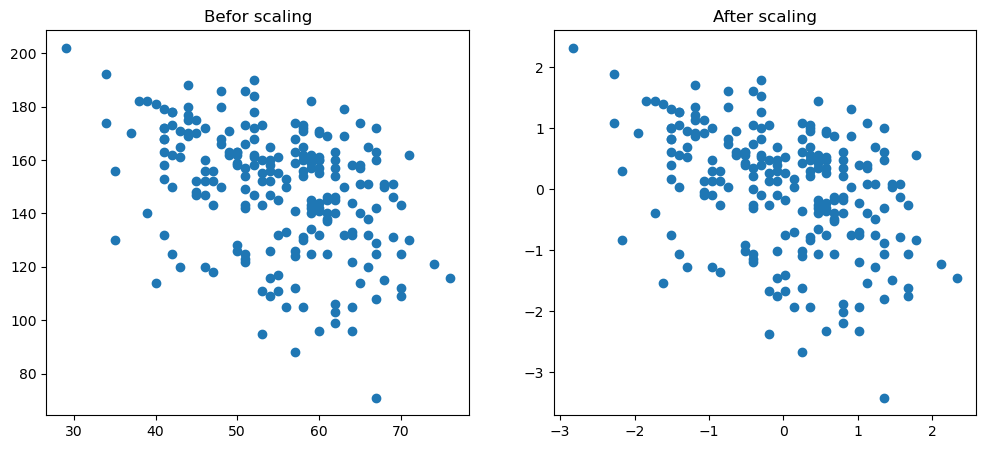

In [51]:
fig,(a1,a2)=plt.subplots(ncols=2,figsize=(12,5))
a1.scatter(X_train["age"],X_train["max heart rate"])
a1.set_title("Befor scaling")
a2.scatter(x_train_scaler["age"],x_train_scaler["max heart rate"])
a2.set_title("After scaling")
plt.show()

# # linear regression

In [33]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [34]:
y_pred

array([1.59059065, 1.53933274, 1.03680329, 1.05767156, 1.19916038,
       1.54035125, 1.48536039, 1.05000545, 1.3175534 , 1.11010926,
       1.21502308, 1.5056826 , 1.69520009, 1.77701941, 1.36639472,
       1.25065983, 1.55075052, 1.30388737, 1.76022256, 1.35056656,
       1.88342271, 1.25052112, 1.53719697, 1.27023019, 1.43007661,
       2.12262516, 1.3607899 , 1.71292102, 0.90873932, 1.07118148,
       0.90866022, 1.18736924, 1.54047318, 1.14970932, 1.3799477 ,
       1.59441714, 1.88868321, 1.09979929, 1.82630112, 1.17663586,
       1.05162176, 1.15125895, 1.30429728, 1.37717358, 0.86152289,
       0.98940439, 1.16739396, 1.71027473, 1.56494468, 1.38615025,
       1.16688871, 0.94879701, 1.20636382, 1.73968635])

In [35]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [36]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 0.10861936381640491


# # rmse

In [37]:
rmse=np.sqrt(mean_squared_error(y_test,y_pred))

In [38]:
rmse

0.3295745193676309

# #  diffrence between actual and predicted

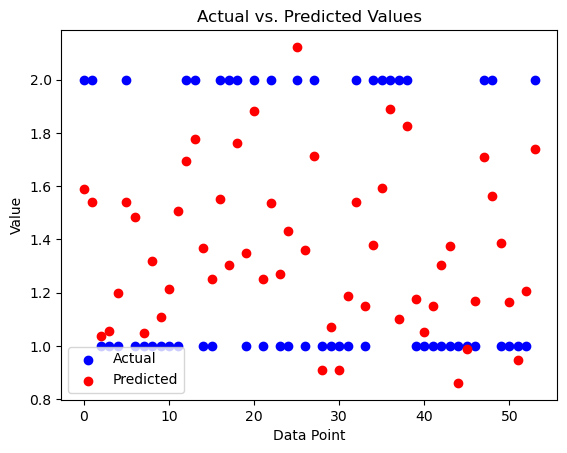

In [47]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

# Plot the actual values
ax.scatter(range(len(y_test)), y_test, color='blue', label='Actual')

# Plot the predicted values
ax.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted')

# Set labels and title
ax.set_xlabel('Data Point')
ax.set_ylabel('Value')
ax.set_title('Actual vs. Predicted Values')

# Add a legend
ax.legend()

# Display the plot
plt.show()